In [1]:
%load_ext tensorboard
import librosa
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import IPython.display as ipd

# prep

In [2]:
SAMPLE_RATE = 22050

In [3]:
def load():
    """
    Load 10 second chunks of songs
    """

    files = list(Path("./data/").glob("*.mp3"))
    chunks = []
    for file in files:
        y, sr =  librosa.load(file, mono=True,sr=SAMPLE_RATE)
        size = int(SAMPLE_RATE * 10)
        sampleLen = len(y)
        for startPos in range(0,sampleLen,size):
            end = startPos+size
            if end > sampleLen:
                pass
            chunk = y[startPos:end]
            chunks.append(chunk)
    return chunks

In [4]:
def dataset(chunks):
    x,y = [],[]
    size = int(SAMPLE_RATE*5)
    for chunk in chunks:
        Ax = chunk[:size]
        Ay = chunk[size:size*2]
        if(len(Ax) == size and len(Ay) == size):
            x.append(librosa.feature.melspectrogram(y=Ax, sr=SAMPLE_RATE))
            y.append(librosa.feature.melspectrogram(y=Ay, sr=SAMPLE_RATE))
    return x,y

In [5]:
def showSpec(spec):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec, sr=SAMPLE_RATE,
                             x_axis='time', y_axis='mel',
                             cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()

In [6]:
def playSpec(spec):
    S = librosa.feature.inverse.mel_to_stft(spec, sr=SAMPLE_RATE)
    audio = librosa.griffinlim(S,n_iter=25,momentum=0.99)
    audio = librosa.effects.preemphasis(audio)  # Reapply pre-emphasis

    plt.figure(figsize=(12,4))
    plt.plot(audio)
    plt.title('waveform')
    plt.show()

    display(ipd.Audio(audio,rate=SAMPLE_RATE))

# Load Data

In [7]:
chunks = load()

In [8]:
x,y = dataset(chunks)

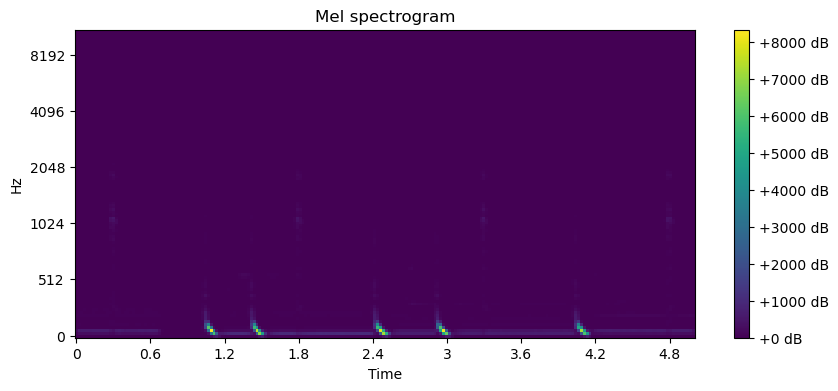

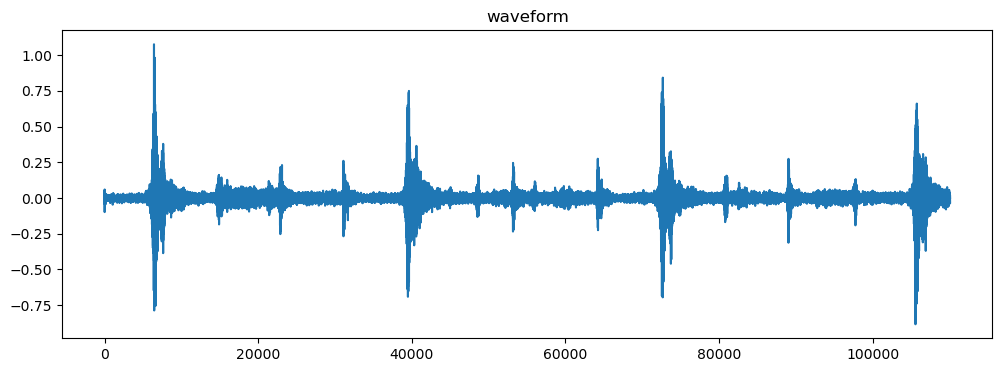

In [9]:
#verify loaded data
sample=x[420]
showSpec(sample)
playSpec(sample)